<a href="https://colab.research.google.com/github/jjcrofts77/Advanced-Calculus-MATH20471/blob/main/content/notebooks/Part1/Chapter1/IBVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Initial and Boundary Value Problems (IBVP)

Consider a second-order ordinary differential equation (ODE)
 
$$
x'' = f(t,x,x') 
$$

where $ x'=\mathrm{d}x/\mathrm{d}t $ and $ x''=\mathrm{d}^2x/\mathrm{d}t^2 $. The problem is to find $x(t)$ subject to appropriate additional information.

Familiar examples of such equations include

$$
 \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} &= \sin{t}\\
 \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} &= -3\frac{\mathrm{d} x}{\mathrm{d}t} - 2x 
$$

## Initial-value problem (IVP)
Suppose $x(0)$ and $x'(0)$ (or more generally $x(t_0)$ and $x'(t_0)$) are prescribed. Consider the second-order differential equation 

$$
x''(t) = \mu(1-x^2(t))x'(t) - x(t),\quad t\geq 0
$$ (VanDerPol)

for a function $x(t)$, with initial data

$$
 x(0) = x_0,~ x'(0) = \nu_0.
$$

Here $\mu, x_0, \nu_0$ are constants. 

Because we specify sufficient conditions at an initial time $t=0$ ($t=t_0$) to fix the solution, this is called an *initial value problem* (IVP).

Note that the example given above is the famed *Van der Pol equation*, which was originally proposed by the Dutch electrical engineer [Balthasar 
van der Pol](https://en.wikipedia.org/wiki/Balthasar_van_der_Pol) to model oscillations observed in certain types of electrical circuits. It is an example of a *nonlinear differential equation* and importantly does 
not admit an analytic solution. (It can however be analysed both numerically and by using the methods of dynamical systems -- see (take?) the third year module 
*Numerical Analysis and Dynamical Systems* for more details!)

<br>

```{prf:example} 
:label: example1

Below, we use numerical methods, such as those you are currently learning about in the *Numerical Methods for ODEs* module, to solve the Van der Pol Equation in {prf:ref}`VanDerPol`
```

````{margin}
```{note}
Since this equation is nonlinear it can **not** be solved analytically.
```
````

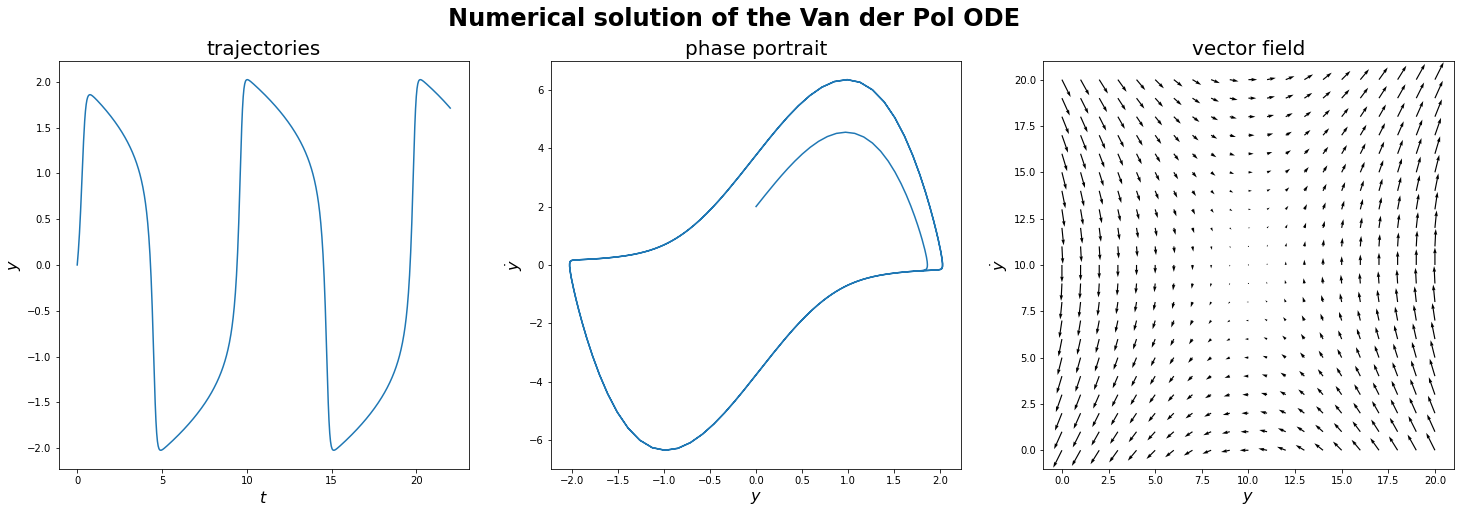

In [ ]:
# Van der Pol - numerical solution 

# load packages for integrating ODEs and plotting solutions
import numpy as np # matlab-like commands 
import matplotlib.pyplot as plt # plotting tools
from scipy.integrate import odeint # ode solver

# RHS function of the Van der Pol ODE (written as a first order system - see NMODEs!)
def rhs(Y,t,mu):
  y,ydot=Y
  return ydot, mu*(1-y**2)*ydot-y

t = np.linspace(0,7*np.pi,1001) # integration interval
y0 = [0, 2]                     # initial condition
mu = 4                          # paramater value

# integrate numerically using RK4
y_arr = odeint(rhs,y0,t,args=(mu,))
y,ydot = y_arr[:,0],y_arr[:,1]

# initialise plots
plt.ion()
plt.figure(figsize=[25,7.5])

# trajectories
plt.subplot(131)
plt.plot(t, y)
plt.title('trajectories',size=20)
plt.xlabel('$t$',size=16)
plt.ylabel('$y$',size=16)

# phase portrait
plt.subplot(132)
plt.plot(y,ydot)
plt.xlabel('$y$',size=16)
plt.ylabel('$\dot{y}$',size=16)
plt.title('phase portrait',size=20)

# vector field
y,ydot = np.mgrid[-3:3:21j,-6:6:21j]
u,v = rhs(np.array([y,ydot]),0.0,mu)
mag = np.hypot(u,v)
mag[mag==0] = 1.0
plt.subplot(133)
plt.quiver(y,ydot)
plt.xlabel('$y$',size=16)
plt.ylabel('$\dot{y}$',size=16)
plt.title('vector field',size=20)

# add title
plt.suptitle('Numerical solution of the Van der Pol ODE',size=24,weight='bold');

# draw
plt.show()

```{note}
We do not consider numerical solutions of ODEs (or PDEs...) in this course so don't worry too much if the above is a little hard to follow! The above illustration is really just to get you thinking about what the solution of an ODE looks like and also to highlight the importance of numerical methods (most real-world problems result in nonlinear ODEs that can't be solved analytically). 
```

## Boundary value problem (BVP)
Suppose $x(t)$ is defined on an interval $\displaystyle [a, b]$ and $\displaystyle x(a) = A$ and $\displaystyle x(b) = B$ are prescribed. Consider, for example, the linear equation

$$
x''(t) = \mu^2 x(t), ~~0 < t < 1,\quad \text{with}\quad x(0) = A,~~ x(1) = B.
$$

Such equations are called *two-point boundary value problems*.

In the simple case given above, we can solve in the usual way to obtain solutions

$$
 x_1(t) = e^{\mu t} \quad\text{and}\quad x_2(t) = e^{-\mu t}. 
$$

Linearity then implies that the general solution is 

$$
x(t) &= C_1x_1(t) + C_2x_2(t)\\
&= C_1e^{\mu t} + C_2e^{-\mu t},
$$ 

where $C_1$ and $C_2$ are constants. 

All that remains in order to solve our BVP is to determine for which values of $\mu, C_1$ and $C_2$ the determined solution satisfies the boundary conditions. 

We shall return to this problem in some detail later on in the course, but it is worth noting that in general boundary value problems (BVPs) are much harder to solve than IVPs. (This follows due to their *global* as opposed to *local* nature.)

<br>

````{prf:example}
:label: example2

Conisider the following example of a two-point boundary value problem

```{math}
 u''(x)+u(x) = 0, \quad u(0)=0,\quad u'(\pi)=1,\quad 0\leq x\leq \pi
```

This problem can be solved analytically with exact solution $u(x) = -\sin(x)$ and we shall see how to derive this later on in the course.
````

````{margin}
```{note}
It is easy to check that $u(x) = -\sin(x)$ is a solution by differentiation and checking it satisfies the BCs.
```
````

Below we show some python code (click the tab to reveal the code) for solving the above BVP along with a plot of the solution.

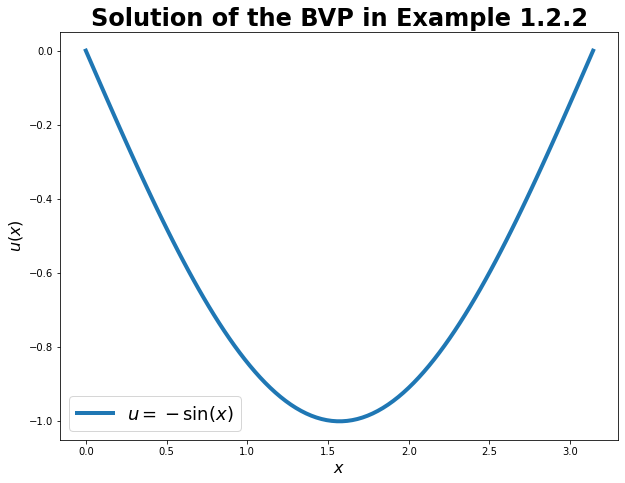

In [ ]:
import numpy as np
from scipy.integrate import solve_bvp # BVP solver

# write as a system of first order ODEs
def ode(x, Z):
  u,du = Z
  return [du, -u]

# boundary conditions function
def bc(u, du):
    return [u[0], du[1]-1.0]  

# define an initail mesh with 5 points
x = np.linspace(0, np.pi, 5)

# initial guesses
u0 = [np.zeros(x.size),np.ones(x.size)]
res = solve_bvp(ode, bc, x, u0) # solve the BVP

# plot the solution
# initialise plots
plt.ion()
plt.figure(figsize=[10,7.5])
x_plot = np.linspace(0, np.pi, 100)
u_plot = res.sol(x_plot)[0]

import matplotlib.pyplot as plt
plt.plot(x_plot, u_plot, linewidth=4,label='$u=-\sin(x)$')
plt.legend(fontsize=18)
plt.xlabel("$x$",size=16)
plt.ylabel("$u(x)$",size=16)
plt.title('Solution of the BVP in Example 2',size=24,weight='bold')
plt.show()

## Existence and uniquness
We conclude this section by noting that solutions of IV and BV problems may not exist, or if they exist, may not be unique. 

See below for such examples.

- **IVP:** $\displaystyle x''=6x^{1/3},~ x(0) = 0, x'(0)=0$ has solutions $x(t)=0$ and $\displaystyle x(t)=t^3$ and so uniqueness breaks down. 

- **BVP1:** $\displaystyle x''+x=0,~ x(0)=1, x(2\pi)=0$ has no solution and so existence fails.

- **BVP2:** $\displaystyle x''+x=0,~ x(0)=x(2\pi)=0$ has infinitely many solutions, $\displaystyle x(t)=c\sin{t}$, where $c$ is an arbitrary constant (non-uniqueness).